In [2]:
import cv2
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

(-0.5, 1023.5, 478.5, -0.5)

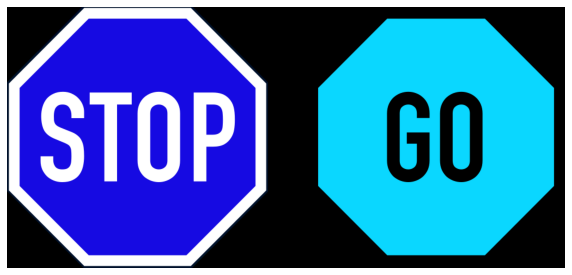

In [8]:
# Read Image

img = cv2.imread('artifacts/sign.png')

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis('off')

(-0.5, 1023.5, 478.5, -0.5)

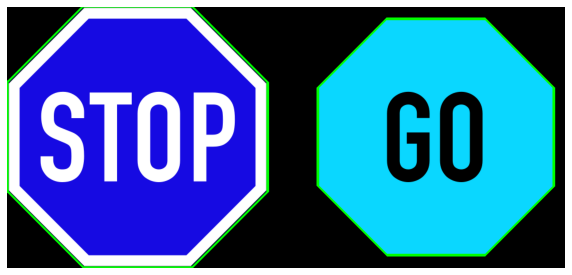

In [9]:
# Detect and Draw Contours

img_copy = img.copy()

# Convert to grayscale
gray = cv2.cvtColor(img_copy,cv2.COLOR_BGR2GRAY)
 
# Find all contours in the image
contours, hierarchy = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
 
# Draw all the contours.
contour_image = cv2.drawContours(img_copy, contours, -1, (0,255,0), 3)

plt.figure(figsize=(10,10))
plt.imshow(img_copy)
plt.axis('off')

## Image Moments

Image moments are like the weighted average of the pixel intensities in the image. They help calculate some features like the center of mass of the object, area of the object, etc.

In [11]:
# select a contour

cnt = contours[1]

moments = cv2.moments(cnt)

print(moments)

{'m00': 189702.5, 'm10': 45362507.83333333, 'm01': 45315287.166666664, 'm20': 13717585382.416666, 'm11': 10839766318.958332, 'm02': 13695013903.75, 'm30': 4652647650631.95, 'm21': 3278318191385.85, 'm12': 3276896982542.15, 'm03': 4642973381159.55, 'mu20': 2870300202.0462036, 'mu11': 3772754.995464325, 'mu02': 2870300202.0462036, 'mu30': -280514062.6269531, 'mu21': -281743214.64367676, 'mu12': 281743214.6444092, 'mu03': 280514062.6269531, 'nu20': 0.07975927781742052, 'nu11': 0.000104836495362326, 'nu02': 0.07975927781742052, 'nu30': -1.7896660611545016e-05, 'nu21': -1.7975079911730167e-05, 'nu12': 1.7975079911776896e-05, 'nu03': 1.7896660611545016e-05}


In [14]:
# Lets find its Centroid

# X-coordinate
cx = int(moments['m10']/moments['m00'])

# Y-coordinate
cy = int(moments['m01']/moments['m00'])

cx,cy

(239, 238)

(-0.5, 1023.5, 478.5, -0.5)

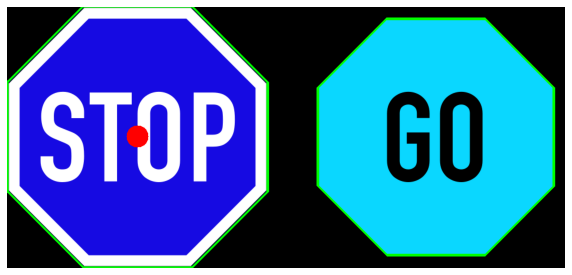

In [17]:
# Draw centroid

cv2.circle(img_copy,(cx,cy),20,(255,0,0),-1)

plt.figure(figsize=(10,10))
plt.imshow(img_copy)
plt.axis('off')

In [20]:
# Lets Find Total Area under Contour

area = cv2.contourArea(cnt)

area

189702.5